<a href="https://colab.research.google.com/github/jwym02/data-vibes/blob/main/GoogleColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as plt
import networkx as nx
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
from nltk.stem import WordNetLemmatizer

In [ ]:
# Download necessary NLTK data files (if not already available)
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# Load the first Excel file
wikileaks_path = "wikileaks_parsed.xlsx"
wikileaks_df = pd.read_excel(wikileaks_path)

# Load the second Excel file
news_path = "news_excerpts_parsed.xlsx"
news_df = pd.read_excel(news_path)

In [ ]:
# Display a summary of both datasets to understand their structure and content
wikileaks_summary = wikileaks_df.head()
news_excerpts_summary = news_df.head()


In [ ]:
wikileaks_summary
news_excerpts_summary

,Link,Text
0,https://edition.cnn.com/2023/09/29/business/st...,Starbucks violated federal labor law when it i...
1,https://www.channelnewsasia.com/singapore/su-w...,The first suspect to plead guilty in Singapore...
2,https://edition.cnn.com/2023/05/22/tech/meta-f...,Meta has been fined a record-breaking €1.2 bil...
3,https://www.channelnewsasia.com/singapore/bill...,SINGAPORE: A 45-year-old man linked to Singapo...
4,https://edition.cnn.com/2024/03/05/politics/li...,The Department of Education imposed a record $...


Preprocessing


In [ ]:
# Preprocessing function
def preprocess_text(text):
    # Remove non-alphanumeric characters and lowercase the text
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower().strip()
    return text

# Apply preprocessing steps
wikileaks_df['Cleaned_Text'] = wikileaks_df['Text'].apply(preprocess_text)
news_df['Cleaned_Text'] = news_df['Text'].apply(preprocess_text)

# Remove duplicates and empty rows
wikileaks_df = wikileaks_df.drop_duplicates(subset=['Cleaned_Text']).dropna(subset=['Cleaned_Text'])
news_df = news_df.drop_duplicates(subset=['Cleaned_Text']).dropna(subset=['Cleaned_Text'])

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatization function
def lemmatize_text(text):
    words = text.split()
    lemmatized = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized)

# Apply lemmatization to the cleaned text
wikileaks_df['Lemmatized_Text'] = wikileaks_df['Cleaned_Text'].apply(lemmatize_text)
news_df['Lemmatized_Text'] = news_df['Cleaned_Text'].apply(lemmatize_text)



In [ ]:
# Display the lemmatized data for review
print("Lemmatized Wikileaks Data:")
print(wikileaks_df.head())  # Displays the first 5 rows of the DataFrame

print("\nLemmatized News Data:")
print(news_df.head())  # Displays the first 5 rows of the DataFrame


Lemmatized Wikileaks Data:
  PDF Path                                               Text  \
0    1.pdf  Pristina Airport – Possible administrative irr...   
1    1.pdf  Investigative details\n\nIn his/her interviews...   
2   10.pdf  "An interoffice memorandum providing an “outst...   
3   10.pdf  "Allegation 2 & 3:\n\n(Specifically, three of ...   
4   10.pdf  "When asked about this in interview, the Divis...   

                                        Cleaned_Text  \
0  pristina airport  possible administrative irre...   
1  investigative details\n\nin hisher interviews ...   
2  an interoffice memorandum providing an outstan...   
3  allegation   \n\nspecifically three of the per...   
4  when asked about this in interview the divisio...   

                                     Lemmatized_Text  
0  pristina airport possible administrative irreg...  
1  investigative detail in hisher interview condu...  
2  an interoffice memorandum providing an outstan...  
3  allegation specificall

In [ ]:
# Replace '\n\n' and '\n' with a space
wikileaks_df['Cleaned_Text'] = wikileaks_df['Cleaned_Text'].str.replace(r'\n+', ' ', regex=True)
news_df['Cleaned_Text'] = news_df['Cleaned_Text'].str.replace(r'\n+', ' ', regex=True)


In [ ]:
print(wikileaks_df['Cleaned_Text'].head())
print(news_df['Cleaned_Text'].head())

0    pristina airport  possible administrative irre...
1    investigative details in hisher interviews con...
2    an interoffice memorandum providing an outstan...
3    allegation    specifically three of the person...
4    when asked about this in interview the divisio...
Name: Cleaned_Text, dtype: object
0    starbucks violated federal labor law when it i...
1    the first suspect to plead guilty in singapore...
2    meta has been fined a recordbreaking  billion ...
3    singapore a yearold man linked to singapores l...
4    the department of education imposed a record  ...
Name: Cleaned_Text, dtype: object


In [ ]:
from nltk.corpus import stopwords

# Download the stop words set
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Apply to the cleaned text column
wikileaks_df['Text_No_Stopwords'] = wikileaks_df['Cleaned_Text'].apply(remove_stopwords)
news_df['Text_No_Stopwords'] = news_df['Cleaned_Text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(wikileaks_df[['Cleaned_Text', 'Text_No_Stopwords']].head())
print(news_df[['Cleaned_Text', 'Text_No_Stopwords']].head())

                                        Cleaned_Text  \
0  pristina airport  possible administrative irre...   
1  investigative details in hisher interviews con...   
2  an interoffice memorandum providing an outstan...   
3  allegation    specifically three of the person...   
4  when asked about this in interview the divisio...   

                                   Text_No_Stopwords  
0  pristina airport possible administrative irreg...  
1  investigative details hisher interviews conduc...  
2  interoffice memorandum providing outstanding i...  
3  allegation specifically three persons bid open...  
4  asked interview divisional manager stated with...  
                                        Cleaned_Text  \
0  starbucks violated federal labor law when it i...   
1  the first suspect to plead guilty in singapore...   
2  meta has been fined a recordbreaking  billion ...   
3  singapore a yearold man linked to singapores l...   
4  the department of education imposed a record  ... 

In [ ]:
news_df.to_csv('test.csv', index=False)

In [ ]:
from itertools import combinations
import pandas as pd

# Sample function to extract relationships based on co-occurrence
def extract_relationships(text, entities):
    # Find all entity pairs
    entity_pairs = list(combinations(entities, 2))
    return entity_pairs

# Example data for entities (mock entity extraction)
entities = ["airport", "administrative", "division"]

# Apply to the dataset
wikileaks_df['Relationships'] = wikileaks_df['Cleaned_Text'].apply(
    lambda x: extract_relationships(x, entities)  # Replace `entities` with actual entity extraction logic
)


In [ ]:
from collections import Counter

# Flatten relationships from all rows
all_relationships = [rel for sublist in wikileaks_df['Relationships'] for rel in sublist]
relationship_counts = Counter(all_relationships)

# Convert to a DataFrame
relationship_df = pd.DataFrame(relationship_counts.items(), columns=["Entity Pair", "Count"])
print(relationship_df)


                  Entity Pair  Count
0   (airport, administrative)    143
1         (airport, division)    143
2  (administrative, division)    143


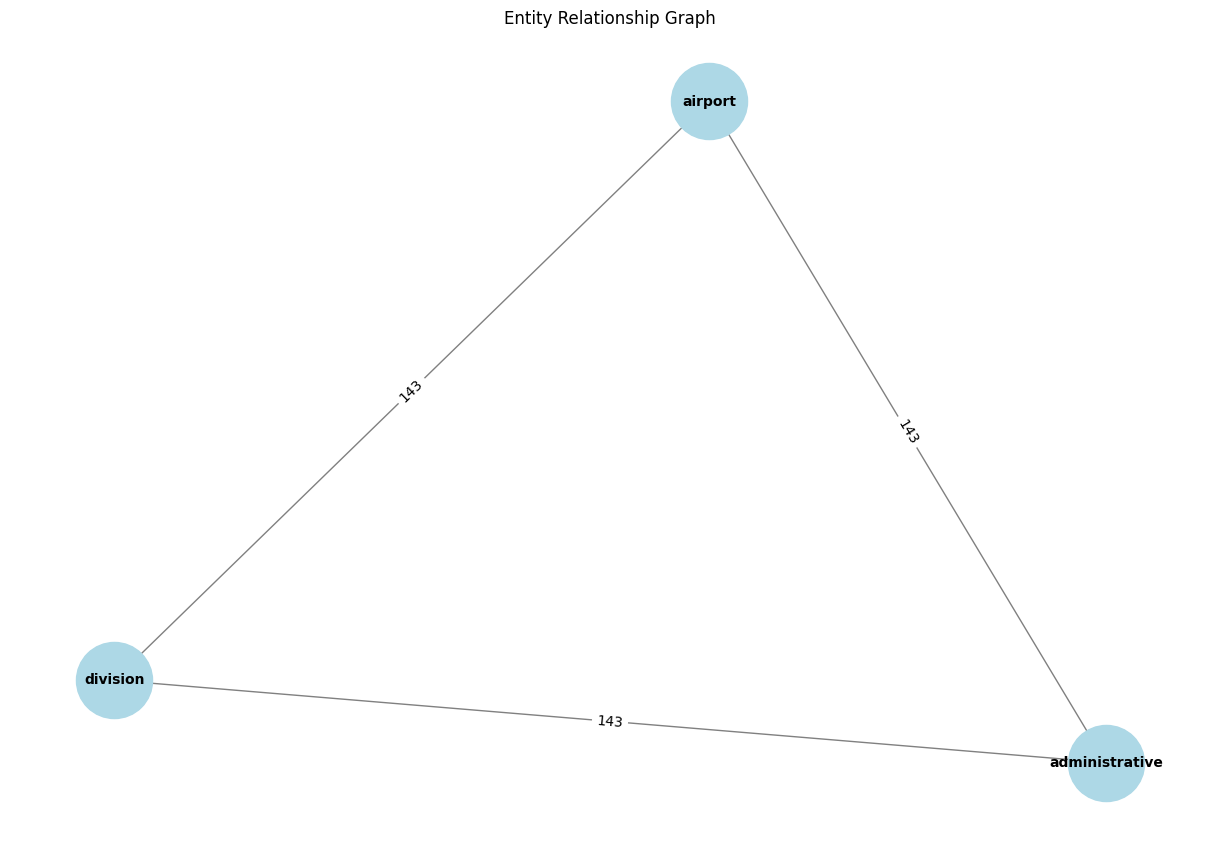

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add edges with weights
for (entity1, entity2), count in relationship_counts.items():
    G.add_edge(entity1, entity2, weight=count)

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
nx.draw(
    G, pos, with_labels=True, node_size=3000, node_color="lightblue",
    font_size=10, font_weight="bold", edge_color="gray"
)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Entity Relationship Graph")
plt.show()
